# Titanic Data Logistical Regression Practice

First we begin with our imports:

In [1]:
import pandas as pd
import numpy as np

Visualization imports are next:

In [2]:
import matplotlib.pyplot as ply
import seaborn as sns
%matplotlib inline
    ##since we are using Jupyter Notebook

In [3]:
train = pd.read_csv("titanic_train.csv")
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


notice we have a survived column that indicates oif the person survived or not.

## Exploratory Data Analysis.

First thing we need to do is handle missing values in our data set. We can take a look at then:

In [4]:
## train.isnull() ## we get boolians of true or falce.

We can create a heatmap to better look at our missing values:

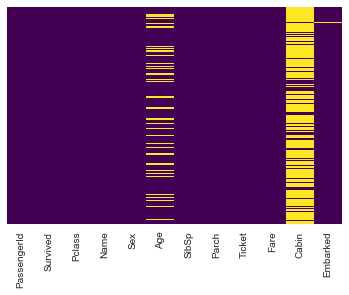

In [5]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap = "viridis")

Taking a look at our age column we can probably replace all the missing values with similar values in the same column. Not so much for the cabin column.

In [6]:
sns.set_style("whitegrid")

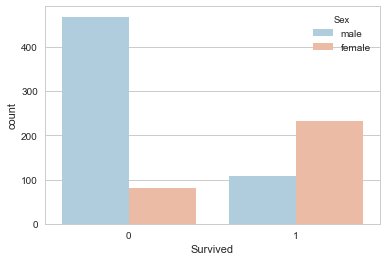

In [7]:
sns.countplot(x = "Survived", data = train, hue = "Sex", palette = "RdBu_r")

It looks that the people who survived were more likely to be femal, and thoes that did not surevive were more likely to be male. This Information will be useful when we develop our model.

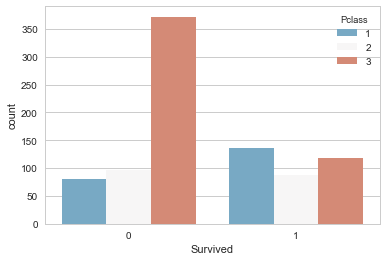

In [8]:
sns.countplot(x = "Survived", data = train, hue = "Pclass", palette = "RdBu_r")

It also looks that people in the 3rd class were the least likely to survive.

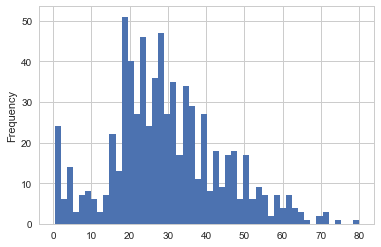

In [9]:
train['Age'].plot.hist(bins = 50)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


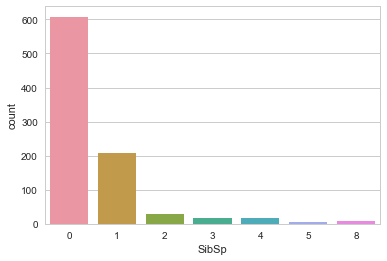

In [11]:
sns.countplot(x = "SibSp", data = train)

most people did not have a spouce or children on board with them.

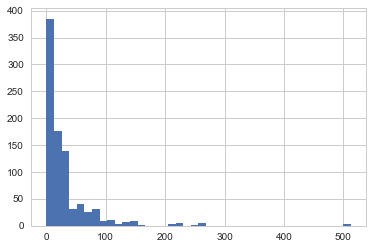

In [12]:
train["Fare"].hist(bins =40)

most tickets seems to be in the cheap end. this makes sence if most of the people were in the third class.

## Part 2: Cleaning our Data

Our Age column is missing data. We can replace this missing data by averaging the age of the people on board "data imputation". We can further develop our imputation by averaging it by passenger class.

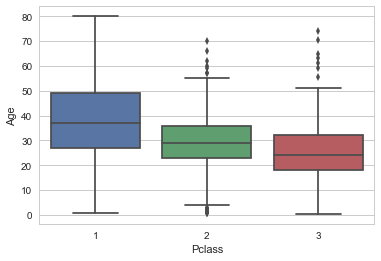

In [13]:
sns.boxplot(x = "Pclass", y = "Age", data = train)

In [14]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    ## if at this particular point age is null then replace it coorosponding class value.
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 25
    else:
        return Age

In [15]:
train[["Age", "Pclass"]].head(2)

,Age,Pclass
0,22.0,3
1,38.0,1


In [16]:
train['Age'] = train[["Age", "Pclass"]].apply(impute_age, axis = 1)

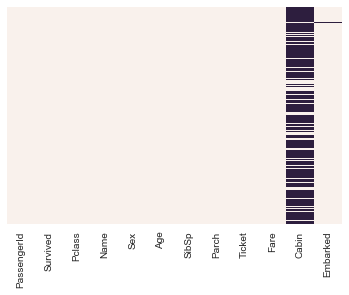

In [17]:
sns.heatmap(train.isnull(), yticklabels=False, cbar = False)

Still to many missing values in cabin to do anything useful so should probably drop the column.

In [18]:
train.drop('Cabin', axis = 1, inplace = True)

In [19]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [20]:
train.dropna(inplace = True)

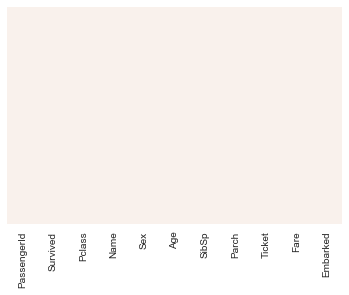

In [21]:
sns.heatmap(train.isnull(), yticklabels=False, cbar = False)

we see that now we dont have any missing values

## Coding Categorical Variables with Dummy Variables.

Two columns that we can look to code with a dummy variables are the 'Sex' and 'Embark' column.

In [22]:
sex = pd.get_dummies(train['Sex'], drop_first = True)

In [23]:
embark = pd.get_dummies(train['Embarked'], drop_first = True)

now that we have replaced the values in the two columns we can add them back into our data frame

In [24]:
train = pd.concat([train, sex, embark], axis = 1)

In [25]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S,1,0,1


In [26]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis = 1, inplace = True)

In [27]:
train.head(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0


In [28]:
train.drop('PassengerId', axis = 1, inplace = True)

In [29]:
train.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0


## Training and Building the Logistics Model

For this experiment we will treat our 'train' df as the entire data and not use the test data set that comes with the titanic data set package.

In [30]:
X = train.drop('Survived', axis = 1) 
y = train['Survived']

In [31]:
from sklearn.cross_validation import train_test_split

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
logmodel = LogisticRegression()

In [35]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [36]:
prediction = logmodel.predict(X_test)

In [37]:
from sklearn.metrics import classification_report

In [39]:
print(classification_report(y_test, prediction))

             precision    recall  f1-score   support

          0       0.80      0.91      0.85       163
          1       0.82      0.65      0.73       104

avg / total       0.81      0.81      0.80       267



In [40]:
from sklearn.metrics import confusion_matrix

In [41]:
confusion_matrix(y_test, prediction)

array([[148,  15],
       [ 36,  68]])